Sprawozdanie 5 Bazyli Polednia

In [3]:
import numpy as np
from numpy.linalg import inv
from scipy.linalg import hilbert
from scipy.linalg import solve_triangular
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import bicg
from scipy.sparse.linalg import gmres
from numpy.linalg import cond
import math
import time
import matplotlib.pyplot as plt

Zadanie 1:

Rozwiązanie zmienia się o duże wartości przy niewielkich zmianach wektora prawych stron

In [4]:
def conditionNumber(matrix):
    invMatrix = inv(np.matrix(matrix))
    invMatrix = np.absolute(invMatrix)
    aMax = np.max(np.sum(aMatrix, axis=1), axis=0)
    aInvMax = np.max(np.sum(invMatrix, axis=1), axis=0)

    return(aMax[0, 0] * aInvMax[0, 0])

aMatrix = np.matrix([[1,1],[1,1.0001]])
print("Współczynnik uwarunkowania A: ", conditionNumber(aMatrix))

b1 = [2, 2.0001]
b2 = [2, 2]
print("Rozwiązanie dla [2, 2.0001]: ", np.matmul(inv(aMatrix), b1))
print("Rozwiązanie dla [2, 2]:", np.matmul(inv(aMatrix), b2))

Współczynnik uwarunkowania A:  40004.0001000044
Rozwiązanie dla [2, 2.0001]:  [[1. 1.]]
Rozwiązanie dla [2, 2]: [[2. 0.]]


Zadanie 2:

Jeżeli występowałaby ona jako macierz A w równaniu, to rozwiązanie byłoby bardzo niestabilne.

In [6]:
hilbertMatrix = hilbert(8)
print("Norma wierszowa: ", cond(hilbertMatrix, np.inf))
print("Norma kolumnowa: ", cond(hilbertMatrix, 1))
print("Norma spektralna: ", cond(hilbertMatrix, 2))

Norma wierszowa:  33872789536.91961
Norma kolumnowa:  33872789532.499146
Norma spektralna:  15257575270.772364


Zadanie 3:

In [8]:
n = 20
t = np.linspace(0.0, 1.0, n)
t = np.transpose(t)
b = []
for i in range(n):
    b.append(math.cos(4*t[i]))
b = np.transpose(b)

A = np.vander(t, n)
A = np.fliplr(A)

np.set_printoptions(suppress=True)

timer = []
for i in range(100):
    start = time.perf_counter()
    x = np.linalg.solve(A, b)
    end = time.perf_counter()
    timer.append((end-start) * 1000)

linalgSolveTime = np.mean(timer)
xLinalgSolve = x



timer = []
for i in range(100):
    start = time.perf_counter()
    x = np.linalg.lstsq(A, b, rcond=None)[0]
    end = time.perf_counter()
    timer.append((end - start) * 1000)

linalgLstsqTime = np.mean(timer)
xLinalgLstsq = x



timer = []
for i in range(100):
    start = time.perf_counter()
    q, r = np.linalg.qr(A)
    x = solve_triangular(r, np.matmul(np.transpose(q), b))
    end = time.perf_counter()
    timer.append((end - start) * 1000)

qrTime = np.mean(timer)
xQr = x




print("linalg.solve:\n", xLinalgSolve)
print("linalg.lstsq:\n", xLinalgLstsq)
print("qr:\n",xQr)
print("\nlinalg.solve time:", linalgSolveTime, "ms")
print("linalg.lstsq time:", linalgLstsqTime, "ms")
print("qr time:", qrTime, "ms")

print("\nJakość linalg.solve:", np.linalg.norm(b - np.multiply(A, xLinalgSolve), np.inf))
print("Jakość linalg.lstsq:", np.linalg.norm(b - np.multiply(A, xLinalgLstsq), np.inf))
print("Jakość qr:", np.linalg.norm(b - np.multiply(A, xQr), np.inf))


linalg.solve:
 [ 1.          0.         -8.00000001  0.00000016 10.66666398  0.00002928
 -5.68911517  0.00129195  1.61979719  0.01875173 -0.33800103  0.10068853
 -0.12727042  0.20427971 -0.20150982  0.1457182  -0.07797074  0.02889259
 -0.00658445  0.0006947 ]
linalg.lstsq:
 [ 1.          0.         -8.          0.         10.66666663  0.00000052
 -5.68889339  0.00002683  1.62528343  0.00034212 -0.28968094  0.00097447
  0.03450359 -0.00093311 -0.00039345 -0.00342864  0.00289244 -0.0013245
  0.00036744 -0.00004706]
qr:
 [ 1.         -0.         -8.         -0.00000005 10.66666748 -0.00000879
 -5.68882179 -0.00037787  1.62700922 -0.00530673 -0.2753403  -0.02740145
  0.07825685 -0.0532089   0.04741821 -0.03620421  0.01915496 -0.00682657
  0.00150006 -0.00015375]

linalg.solve time: 0.10921416444997334 ms
linalg.lstsq time: 0.09999755749099393 ms
qr time: 0.22297943438292833 ms

Jakość linalg.solve: 37.315753586352905
Jakość linalg.lstsq: 37.317898100921035
Jakość qr: 37.31858300923798


Zadanie 4:

Na wykresie jakości rozwiązania większość punktów się pokrywa.

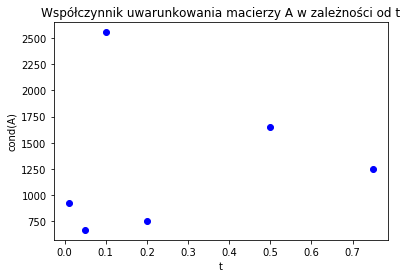

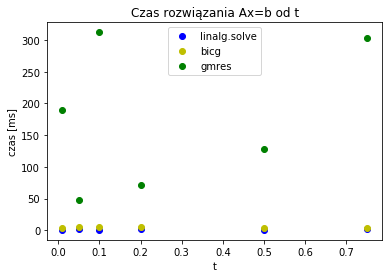

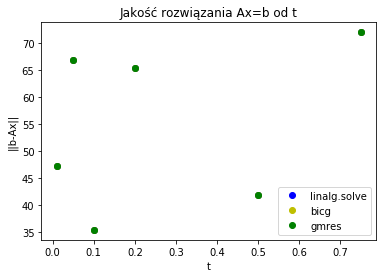

In [10]:
def matrixA(n, t):
    A = np.diag(np.ones(n))
    X = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            X[i][j] = np.random.uniform(-1, 1)

    X = np.tril(X) - np.diag(np.diag(X))
    A = A + X + np.transpose(X)

    for i in range(n):
        for j in range(n):
            if A[i][j] > t and i != j:
                A[i][j] = 0

    return A

n = 50
b = np.empty([n])
for i in range(n):
    b[i] = np.random.uniform(-1,1)

t = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
qualityLinalg = []
qualityBicg = []
qualityGmres = []
timerLinalg = []
timerBicg = []
timerGmres = []

for it in t:
    currentA = matrixA(n, it)
    plt.plot(it, np.linalg.cond(currentA, np.inf), 'bo')
    denseMatrixA = csr_matrix(currentA)
    timerLinalgTmp = []
    timerBicgTmp = []
    timerGmresTmp = []


    for i in range(3):
        start = time.perf_counter()
        xLinalg = np.linalg.solve(currentA, b)
        end = time.perf_counter()
        timerLinalgTmp.append((end - start) * 1000)


    for i in range(3):
        start = time.perf_counter()
        xBicg = bicg(denseMatrixA, b)[0]
        end = time.perf_counter()
        timerBicgTmp.append((end - start) * 1000)

    for i in range(3):
        start = time.perf_counter()
        xGmres = gmres(denseMatrixA, b)[0]
        end = time.perf_counter()
        timerGmresTmp.append((end - start) * 1000)

    timerLinalg.append(np.mean(timerLinalgTmp))
    timerBicg.append(np.mean(timerBicgTmp))
    timerGmres.append(np.mean(timerGmresTmp))
    qualityLinalg.append(np.linalg.norm(b - np.multiply(currentA, xLinalg), np.inf))
    qualityBicg.append(np.linalg.norm(b - np.multiply(currentA, xBicg), np.inf))
    qualityGmres.append(np.linalg.norm(b - np.multiply(currentA, xGmres), np.inf))


plt.xlabel('t')
plt.ylabel('cond(A)')
plt.title('Współczynnik uwarunkowania macierzy A w zależności od t')
plt.show()

plt.plot(t, timerLinalg, 'bo', label='linalg.solve')
plt.plot(t, timerBicg, 'yo', label='bicg')
plt.plot(t, timerGmres, 'go', label='gmres')
plt.xlabel('t')
plt.ylabel('czas [ms]')
plt.legend()
plt.title('Czas rozwiązania Ax=b od t')
plt.show()


plt.plot(t, qualityLinalg, 'bo', label='linalg.solve')
plt.plot(t, qualityBicg, 'yo', label='bicg')
plt.plot(t, qualityGmres, 'go', label='gmres')
plt.xlabel('t')
plt.ylabel('||b-Ax||')
plt.legend()
plt.title('Jakość rozwiązania Ax=b od t')
plt.show()

Zadanie 5:

W przypadku zadanej do zbadania macierzy wynik nie jest zbieżny do poprawnego, gdyż macierz A nie jest diagonalnie dominująca

In [11]:
def gauss_seidel(A, b, max_it, eps):

    n = b.size
    x = np.empty([n])
    x = np.zeros_like(x)[np.newaxis]
    x = np.transpose(x)

    while(max_it > 0):
        x_it = np.zeros_like(x)

        for i in range(n):
            sigma = 0
            for j in range(n):
                if i != j:
                    sigma += A.item((i, j)) * x.item((j, 0))
            newElement = (b.item((i, 0)) - sigma)/A.item((i,i))
            x_it.itemset((i,0), newElement)
        if(np.allclose(np.multiply(A, x_it), b, eps)):
            return x_it
        else:
            x = x_it
        max_it -= 1

    return x

max_it = 100
eps = 10**-10

A = np.matrix([[12,3,-5],[1,5,3],[3,7,13]])
b = np.matrix([1,0,1])
b = np.transpose(b)

print("Rozwiązanie metodą Gaussa-Seidela:\n", gauss_seidel(A, b, max_it, eps))
print("Rozwiązanie linalg.solve:\n", np.linalg.solve(A, b))


A = np.matrix([[1,2,3],[2,1,3],[3,2,1]])
b = np.matrix([1,2,0])
b = np.transpose(b)


print("\nRozwiązanie metodą Gaussa-Seidela:\n", gauss_seidel(A, b, max_it, eps))
print("Rozwiązanie linalg.solve:\n", np.linalg.solve(A, b))

Rozwiązanie metodą Gaussa-Seidela:
 [[ 0.14028777]
 [-0.08093525]
 [ 0.0881295 ]]
Rozwiązanie linalg.solve:
 [[ 0.14028777]
 [-0.08093525]
 [ 0.0881295 ]]

Rozwiązanie metodą Gaussa-Seidela:
 [[-1.19737816e+69]
 [-1.19737816e+69]
 [-1.19737816e+69]]
Rozwiązanie linalg.solve:
 [[ 0.25]
 [-0.75]
 [ 0.75]]
